In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_default = pd.read_csv(r'C:\Users\HP\VVSU_Lab\Customers.csv')
df_default

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [3]:
df_default.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [4]:
df_default.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

Данные о покупателях магазина — это подробный анализ идеальных клиентов творческого магазина. Это помогает бизнесу лучше понимать своих клиентов. Владелец магазина получает информацию о Покупателях через членские карты.
Набор данных состоит из 2000 записей и 8 столбцов:
* CustomerID - Идентификатор клиента
* Gender - Пол
* Age - Возвраст
* Annual Income ($) - Годовой доход
* Spending Score (1-100) - Оценка расходов — оценка, присвоенная магазином. 
на основе поведения клиентов и характера расходо
* Profession - Профессия
* Work Experience - Опыт работы - лет
* Family Size - Размер семьив


### Типы переменных

* номинальные - CustomerID, Gender, Profession
* порядковые - Spending Score, Family Size
* числовые непрерывные - Age, Annual Income ($), Work Experience

In [7]:
df_default['Gender'] = df_default['Gender'].map({'Male': 1, 'Female': 0})
df_default = df_default.rename(columns= {'Annual Income ($)': 'Annual_Income',
                            'Spending Score (1-100)': 'Spending_Score',
                            'Work Experience': 'Work_Experience',
                            'Family Size': 'Family_Size'})

In [8]:
for column in df_default.columns:
    print(f'{column}: {df_default[column].nunique()} уникальных значений')

CustomerID: 2000 уникальных значений
Gender: 2 уникальных значений
Age: 100 уникальных значений
Annual_Income: 1786 уникальных значений
Spending_Score: 101 уникальных значений
Profession: 9 уникальных значений
Work_Experience: 18 уникальных значений
Family_Size: 9 уникальных значений


In [21]:
df_default.describe()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Work_Experience,Family_Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.407000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,0.491398,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,0.000000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,0.000000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,1.000000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,1.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


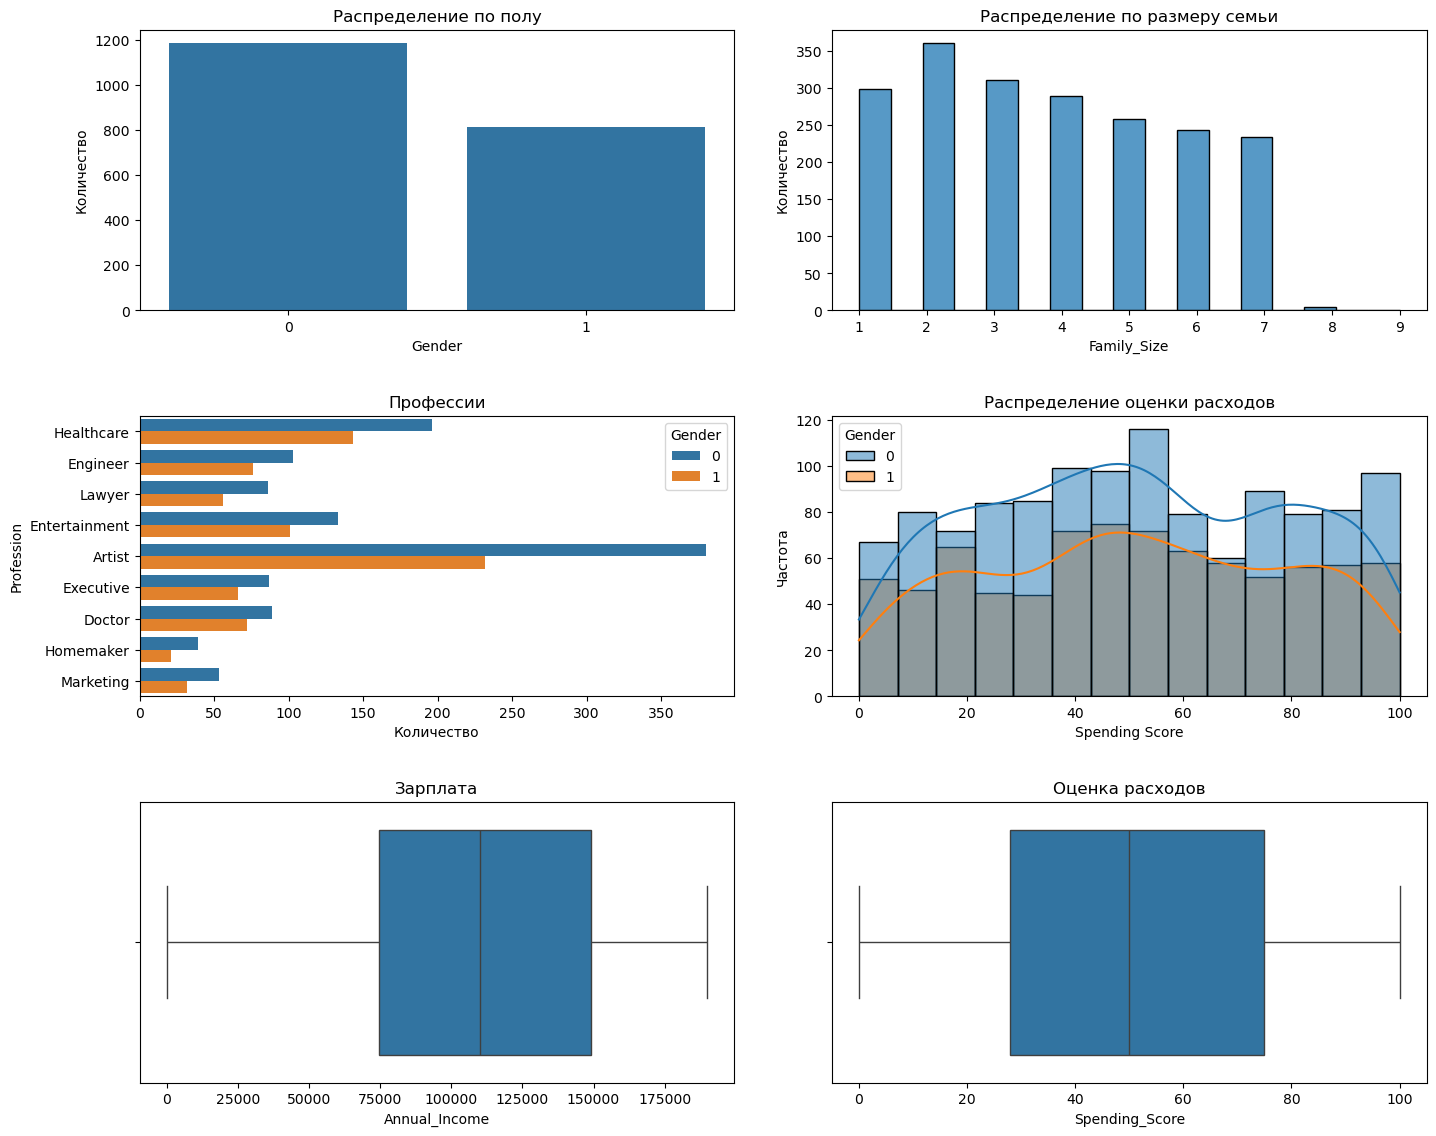

In [61]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

sns.countplot(data=df_default, x='Gender', ax=axes[0,0])
axes[0,0].set_title('Распределение по полу')
axes[0,0].set_ylabel('Количество')

sns.histplot(data=df_default, x='Family_Size', ax=axes[0,1])
axes[0,1].set_title('Распределение по размеру семьи')
axes[0,1].set_ylabel('Количество')

top_professions = df_default['Profession'].value_counts().index
profession_data = df_default[df_default['Profession'].isin(top_professions)]
sns.countplot(data=profession_data, y='Profession', hue='Gender', ax=axes[1,0])
axes[1,0].set_title('Профессии')
axes[1,0].set_xlabel('Количество')

sns.histplot(data=df_default, x='Spending_Score', hue= 'Gender',  kde=True, ax=axes[1,1])
axes[1,1].set_title('Распределение оценки расходов')
axes[1,1].set_ylabel('Частота')
axes[1,1].set_xlabel('Spending Score')

sns.boxplot(x = df_default['Annual_Income'], ax = axes[2,0])
axes[2,0].set_title('Зарплата')

sns.boxplot(x = df_default['Spending_Score'], ax = axes[2,1])
axes[2,1].set_title('Оценка расходов')

plt.tight_layout(pad=3.0)
plt.show()

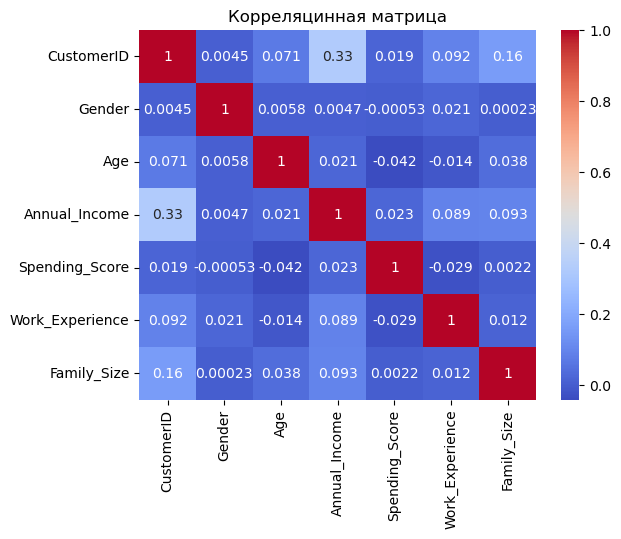

In [81]:
df_corr = df_default.drop('Profession', axis = 1)

corr_matrix = df_corr.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляцинная матрица')
plt.show()